## Practica   2 Analisis de series de tiempo estacionaria
### Profesor: Daniel Jiménez Alcantar
Nombres:

*   Cortes Moreno Mauricio Hamabiel

1.- Elija tres Dataset de su elección, deberá acondicionarse de tal manera que pueda realizar el análisis de una serie de tiempo. Desarrolle un reporte técnico que permita observar el trabajo en los siguientes puntos:

Construir gráfico de la serie de tiempo con los datos del dataset. Explicar el comportamiento.
Aplicar la prueba Dickey-Fuller  a las 3 series de tiempo. Explicar en qué consiste la prueba y los resultados.


##Cargar lo datos
Se utilizaron los siguientes datasets preexistentes en librerías de Python:


*   AirPassengers (statsmodels): Datos mensuales del número de pasajeros aéreos entre 1949 y 1960.

*   Car Sales (seaborn): Datos de ventas de automóviles en distintos periodos.

*   Sunspots (statsmodels): Datos de manchas solares registrados mensualmente.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

#Se cargan los datasets antes mencionados
passengers = sm.datasets.get_rdataset("AirPassengers", package="datasets").data
sunspots = sm.datasets.sunspots.load_pandas().data
car_sales = sns.load_dataset("mpg")[["model_year", "mpg"]]

## Modificaciones
Se modifica el formato de fechas para unificar su formato y poder trabajar con los datos sin invonvenientes *texto en cursiva*

In [2]:
passengers["time"] = pd.date_range(start="1949-01", periods=len(passengers), freq="M")
sunspots["time"] = pd.date_range(start="1749-01", periods=len(sunspots), freq="M")
car_sales = car_sales.groupby("model_year").mean().reset_index()
car_sales["time"] = pd.date_range(start="1970", periods=len(car_sales), freq="A")

<ipython-input-2-a8d50aba2a53>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  passengers["time"] = pd.date_range(start="1949-01", periods=len(passengers), freq="M")
<ipython-input-2-a8d50aba2a53>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sunspots["time"] = pd.date_range(start="1749-01", periods=len(sunspots), freq="M")
<ipython-input-2-a8d50aba2a53>:4: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  car_sales["time"] = pd.date_range(start="1970", periods=len(car_sales), freq="A")


## Graficos de la serie de tiempo
Los siguientes gráficos muestran la evolución de cada serie de tiempo:


*   Pasajeros Aéreos: Presenta una tendencia creciente con patrones estacionales.

*   Ventas de Automóviles: Fluctuaciones periódicas que sugieren efectos estacionales.

*   Manchas Solares: Ciclos de actividad solar con periodos de alta y baja intensidad.

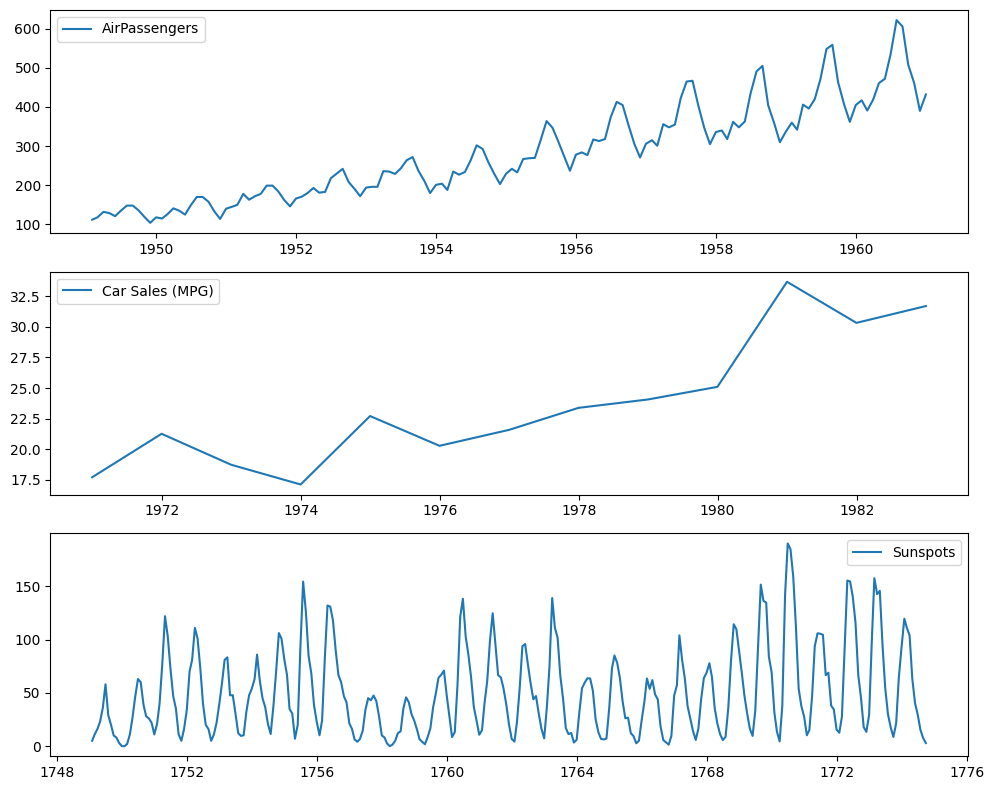

In [3]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8))
axes[0].plot(passengers["time"], passengers["value"], label="AirPassengers")
axes[1].plot(car_sales["time"], car_sales["mpg"], label="Car Sales (MPG)")
axes[2].plot(sunspots["time"], sunspots["SUNACTIVITY"], label="Sunspots")
for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()

## Prueba de Dickey-Fuller
La prueba de Dickey-Fuller verifica si una serie de tiempo es estacionaria. Su hipótesis nula establece que la serie tiene una raíz unitaria (no es estacionaria), mientras que la hipótesis alternativa indica estacionariedad.

In [4]:
def dickey_fuller(series, name):
    result = adfuller(series.dropna())
    print(f"\n{name}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] > 0.05:
        print("La serie no es estacionaria.")
    else:
        print("La serie es estacionaria.")

In [5]:
dickey_fuller(passengers["value"], "AirPassengers")
dickey_fuller(car_sales["mpg"], "Car Sales")
dickey_fuller(sunspots["SUNACTIVITY"], "Sunspots")


AirPassengers:
ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
La serie no es estacionaria.

Car Sales:
ADF Statistic: 1.6356196554209113
p-value: 0.9979605994270155
Critical Values: {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
La serie no es estacionaria.

Sunspots:
ADF Statistic: -2.8377807249381943
p-value: 0.053076421728120673
Critical Values: {'1%': -3.4523371197407404, '5%': -2.871222860740741, '10%': -2.571929211111111}
La serie no es estacionaria.


## Resultados:
AirPassengers: p-valor = 0.9919,p-valor > 0.05, no estacionaria.

Car Sales: p-valor = 0.9980, p-valor > 0.05, no estacionaria.

Sunspots: p-valor = 0.0531, p-valor > 0.05, no estacionaria.

## Conclusiones


Los datos de pasajeros y ventas de automoviles muestran tendencias y estacionalidad, requiriendo transformaciones para el analisis predictivo. A diferencia de lo esperado, los datos de manchas solares también resultaron no estacionarios, aunque con un p-valor cercano al 0.05. Para hacerlos estacionarios, podrían aplicarse otras tecnicas antes de implementar un modelado más avanzado.